In [262]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ubrr-ds/macro.csv
/kaggle/input/ubrr-ds/submission.csv
/kaggle/input/ubrr-ds/train.csv
/kaggle/input/ubrr-ds/test.csv
/kaggle/input/ubrir-data/macro.csv
/kaggle/input/ubrir-data/train.csv
/kaggle/input/ubrir-data/test.csv


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [263]:
train = pd.read_csv('/kaggle/input/ubrr-ds/train.csv')
test = pd.read_csv('/kaggle/input/ubrr-ds/test.csv')
macro = pd.read_csv('/kaggle/input/ubrr-ds/macro.csv')
sumbmiss = pd.read_csv('/kaggle/input/ubrr-ds/submission.csv')

In [264]:
df_1 = pd.concat([train, test])#.merge(macro, how='right')

In [265]:
# Объединяем третий набор по ключу timestamp
df = pd.merge(df_1, macro, on='timestamp', how='left')

In [266]:
for index, row in df.iterrows():
    year = row['timestamp'][0:4]
    df.at[index, 'year'] = int(year)

In [267]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year
count,18866.000000,18866.000000,17291.000000,18838.000000,15505.000000,17445.000000,17445.000000,17445.000000,17445.000000,1.886600e+04,1.509200e+04,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,18799.788614,53.940899,34.259152,7.293715,2.201290,12.423330,1.890112,1.934824,7.206420,1.597157e+05,7.564667e+06,59882.202147,16214.145809,49.840684,41.676655,33.376801,76.599302,2013.837697
std,7082.428695,44.116185,59.944591,5.191169,0.852846,6.279832,1.506052,0.864166,26.981615,3.043511e+05,4.985187e+06,3718.214092,1163.579299,1.843967,2.405770,2.346476,0.229903,0.727231
min,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.546000e+03,3.314640e+05,44898.700000,12856.970000,43.420000,0.100000,2.310000,75.740000,2011.000000
25%,13513.250000,38.000000,20.000000,3.000000,2.000000,9.000000,1.000000,1.000000,5.000000,4.843900e+04,5.100000e+06,55485.200000,15417.340000,48.700000,41.170000,32.960000,76.370000,2013.000000
50%,19043.500000,49.000000,30.000000,6.000000,2.000000,12.000000,1.000000,2.000000,7.000000,8.771300e+04,6.650000e+06,61208.000000,16165.300000,49.750000,41.910000,33.650000,76.700000,2014.000000
75%,24748.750000,63.000000,43.000000,10.000000,3.000000,17.000000,2.000000,3.000000,9.000000,1.253540e+05,8.900000e+06,61208.000000,16648.700000,50.930000,42.640000,34.350000,76.700000,2014.000000
max,30473.000000,5326.000000,7478.000000,77.000000,33.000000,57.000000,6.000000,19.000000,2014.000000,1.716730e+06,9.512250e+07,64310.000000,18745.280000,53.210000,43.850000,35.370000,76.770000,2015.000000


In [268]:
# Для удобства сравнения площадей, объединим колонки с жилой площадью и площадью кухни
df['kitch_life'] = df['life_sq'] + df['kitch_sq']

In [269]:
df = df.drop(['life_sq', 'kitch_sq', 'timestamp', 'id'], axis=1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   full_sq               18866 non-null  int64  
 1   floor                 18838 non-null  float64
 2   state                 15505 non-null  float64
 3   max_floor             17445 non-null  float64
 4   material              17445 non-null  float64
 5   build_year            16866 non-null  object 
 6   num_room              17445 non-null  float64
 7   full_all              18866 non-null  int64  
 8   sub_area              18866 non-null  object 
 9   price_doc             15092 non-null  float64
 10  salary                18866 non-null  float64
 11  fixed_basket          18866 non-null  float64
 12  rent_price_3room_eco  18866 non-null  float64
 13  rent_price_2room_eco  18866 non-null  float64
 14  rent_price_1room_eco  18866 non-null  float64
 15  average_life_exp   

In [271]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['build_year', 'sub_area'] 
 Число столблцов =  2
Числовые данные:	  ['full_sq', 'floor', 'state', 'max_floor', 'material', 'num_room', 'full_all', 'price_doc', 'salary', 'fixed_basket', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', 'average_life_exp', 'year', 'kitch_life'] 
 Число столблцов =  16


**1. ОБРАБОТКА КОЛОНОКВ full_sq и kitch_life**

<Axes: >

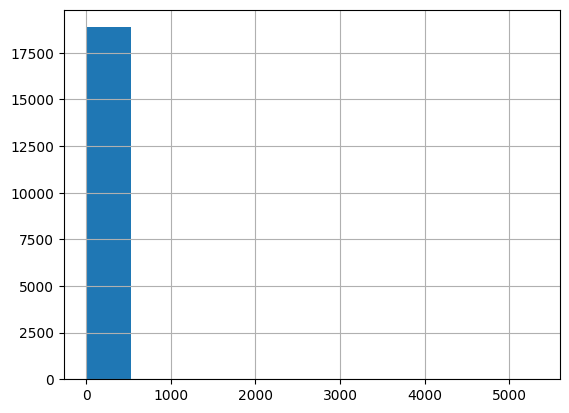

In [272]:
# Посмотрим распределение значений
df['full_sq'].hist()

In [273]:
# Возьмем медиану значений по колонке full_sq в интервале full_sq < 10 и full_sq > 500

median = round(df[df['full_sq'].notnull() & (df['full_sq'] >= 10) & (df['full_sq'] <= 500)]['full_sq'].mean(), 0)

In [274]:
# # Замена значений "54" в строках с более чем 2 встречами на NaN
# for index, row in df_54.iterrows():
#     if ((row == '54').sum() > 2) | ((row == 54).sum() > 2):
#         df.loc[index, df.columns[df == '54'].columns] = np.nan

In [275]:
# Подсчет количества значений 54 в каждой строке
# count_54 = df.apply(lambda row: row.eq(54).sum(), axis=1)

In [276]:
# Замена значений 54 на 0 в тех строках, где оно встречается более 1 раза
# df = df.where(~(count_54 > 2), other='NaN')

In [277]:
# # Замена значений "54" в строках с более чем 2 встречами на NaN
# for index, row in df.iterrows():
#     if (row == '54').sum() > 2:
#         df.loc[index, df.columns[df == '54'].columns] = np.nan

In [278]:
# Присвоим медиану редким значениям(выбросам) и посмотрим гистограмму распределения

df.loc[(df.groupby('full_sq')['full_sq'].transform('size') < 10), 'full_sq'] = median
df.loc[df['full_sq'] < 10, 'full_sq'] = median
df.loc[df['full_sq'] > 500, 'full_sq'] = median
df['full_sq'] = df['full_sq'].fillna(median)

<Axes: >

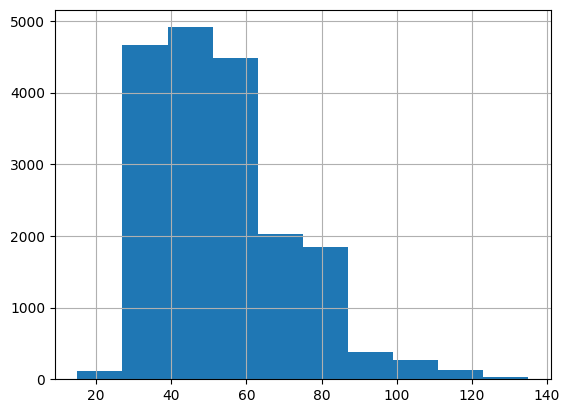

In [279]:
# Посмотрим распределение значений
df['full_sq'].hist()

<Axes: >

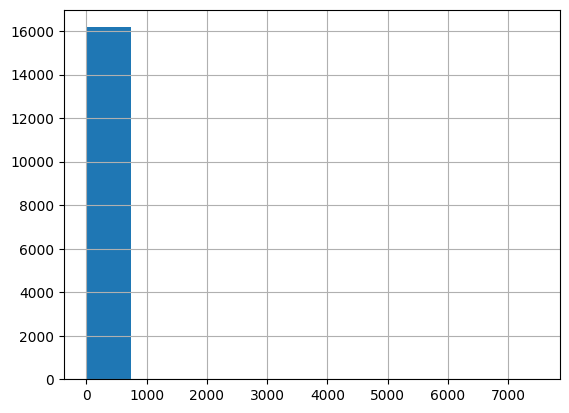

In [280]:
# Посмотрим на распределение kitch_life
df['kitch_life'].hist()

In [281]:
df.head(5)

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life
0,42,8.0,2.0,9.0,1.0,1969.0,2.0,43795,Pechatniki,7100000.0,55485.2,15417.34,48.50,42.00,33.97,76.37,2013.0,34.0
1,55,4.0,3.0,5.0,2.0,1960.0,3.0,21040,Dorogomilovo,11500000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,46.0
2,43,4.0,2.0,5.0,2.0,1960.0,2.0,157010,Ivanovskoe,5800000.0,55485.2,15367.58,49.29,42.02,34.55,76.37,2013.0,34.0
3,62,15.0,NaN,22.0,1.0,1985.0,2.0,178264,Jasenevo,11400000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,45.0
4,80,15.0,1.0,24.0,6.0,2017.0,3.0,76284,Nagatinskij Zaton,12697154.0,64310.0,18745.28,50.42,39.16,31.09,76.77,2015.0,67.0


In [282]:
# Значениям kitch_life, которые превышают общую площадь и с пропущенными значениями, присваиваем значение 0.8 * общей площади

df.loc[df['kitch_life'] > df['full_sq'], 'kitch_life'] = 0.8 * df['full_sq']
df['kitch_life'] = df['kitch_life'].fillna(0.8 * df['full_sq'])

In [283]:
# Значениям kitch_life, которые <  0.5 * full_sq  оприсваиваем как 0.8 от общей площади
df.loc[df['kitch_life'] < 0.5 * df['full_sq'], 'kitch_life'] = round(0.8 * df['full_sq'], 0)

In [284]:
df['full_sq'] = df['full_sq'].astype('int16')

<Axes: >

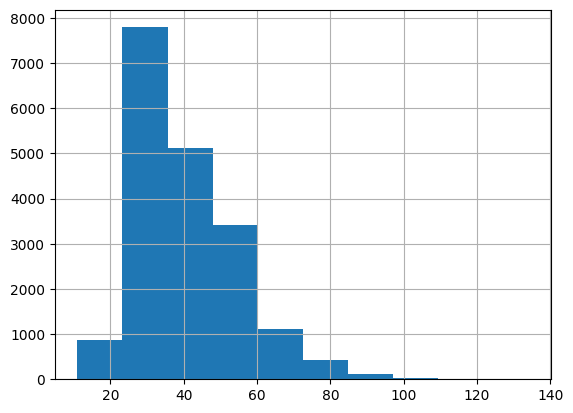

In [285]:
# Посмотрим на распределение kitch_life после обработки
df['kitch_life'].hist()

**2. ОБРАБОТКА КОЛОНОК floor и max_floor**

<Axes: >

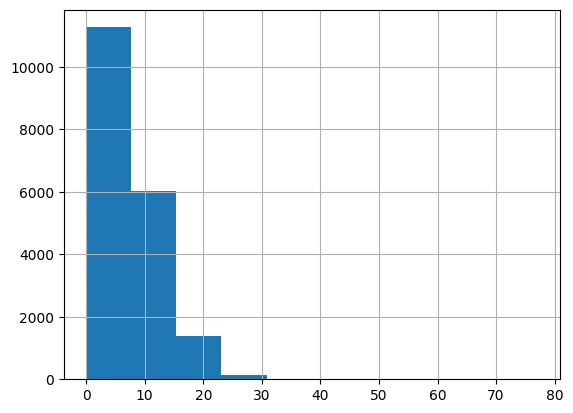

In [286]:
# Посмотрим на распределения
df['floor'].hist()

In [287]:
df['floor'].value_counts()

floor
3.0     1985
2.0     1920
5.0     1836
4.0     1674
1.0     1374
7.0     1284
6.0     1194
8.0     1147
9.0     1085
12.0     785
10.0     770
11.0     737
14.0     565
13.0     504
16.0     430
15.0     422
17.0     361
18.0     139
19.0     129
22.0     100
20.0      91
21.0      76
23.0      73
24.0      60
25.0      46
26.0      12
32.0       7
0.0        7
28.0       5
31.0       5
34.0       3
36.0       2
37.0       2
27.0       2
44.0       1
30.0       1
41.0       1
33.0       1
77.0       1
29.0       1
Name: count, dtype: int64

In [288]:
# Возьмем медиану по колонке floor исключив значения == 0 и редковстречающиеся значения 

median_floor = round(df[df['floor'].notnull() & (df['floor'] > 1) & (df['floor'] <= 26)]['floor'].mean(), 0)


In [289]:
# Заменим редковстречающиеся значения, значения == 0 и Nan на median_floor
df.loc[(df.groupby('floor')['floor'].transform('size') < 10), 'floor'] = median_floor
df.loc[df['floor'] == 0, 'floor'] = median_floor
df['floor'] = df['floor'].fillna(median_floor)

<Axes: >

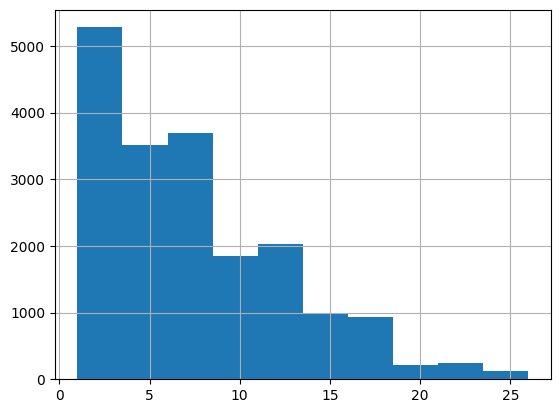

In [290]:
# Посмотрим на распределения
df['floor'].hist()

In [291]:
df['max_floor'].value_counts()

max_floor
17.0    3191
9.0     2953
5.0     2245
12.0    2096
14.0    1336
16.0    1114
22.0     618
1.0      578
25.0     485
24.0     310
8.0      301
10.0     264
4.0      218
15.0     205
3.0      198
0.0      179
19.0     160
18.0     159
20.0     131
6.0      128
7.0      108
23.0      87
2.0       78
13.0      50
21.0      48
11.0      45
30.0      42
40.0      23
27.0      17
32.0      16
28.0      10
26.0      10
37.0       7
48.0       7
29.0       6
39.0       4
34.0       3
33.0       3
36.0       2
47.0       2
31.0       2
38.0       1
41.0       1
57.0       1
42.0       1
45.0       1
44.0       1
Name: count, dtype: int64

In [292]:
# Возьмем медиану по колонке max_floor исключив значения == 0 и редковстречающиеся значения 

median_max_floor = round(df[df['max_floor'].notnull() & (df['max_floor'] > 1) & (df['max_floor'] <= 26)]['max_floor'].mean(), 0)

In [293]:
# Заменим редковстречающиеся значения, значения == 0 и Nan на median_max_floor
df.loc[(df.groupby('max_floor')['max_floor'].transform('size') < 10), 'max_floor'] = median_max_floor
df.loc[df['max_floor'] == 0, 'max_floor'] = median_max_floor
df['max_floor'] = df['max_floor'].fillna(median_max_floor)

In [294]:
# Если этаж больше чем максимальный этаж, то в максимальный этаж записываем значение этажа
df.loc[df['floor'] > df['max_floor'], 'max_floor'] = df['floor']

<Axes: >

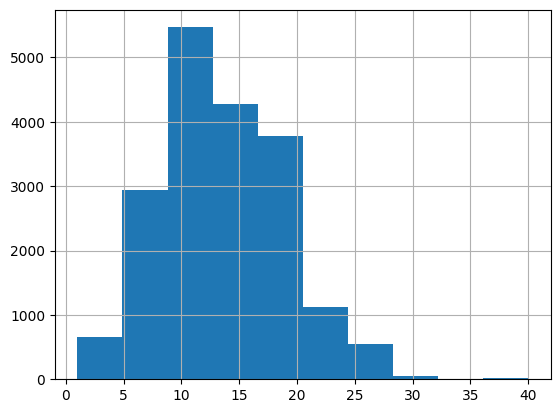

In [295]:
df['max_floor'].hist()

**3. ОБРАБОТКА КОЛОНОК state и material**

In [296]:
df['state'].value_counts()

state
2.0     5823
3.0     5754
1.0     3506
4.0      421
33.0       1
Name: count, dtype: int64

In [297]:
df.loc[df['state'] == 33, 'state'] = 2


In [298]:
len(df[df['state'] == 2])

5824

In [299]:
print(f"Вероятность встретить значение 2 из общего объема {round((len(df[df['state'] == 2]) / len(df[df['state'].notnull()])), 4)}")
print(f"Вероятность встретить значение 3 из общего объема {round((len(df[df['state'] == 3]) / len(df[df['state'].notnull()])), 4)}")
print(f"Вероятность встретить значение 1 из общего объема {round((len(df[df['state'] == 1]) / len(df[df['state'].notnull()])), 4)}")
print(f"Вероятность встретить значение 4 из общего объема {round((len(df[df['state'] == 4]) / len(df[df['state'].notnull()])), 4)}")

Вероятность встретить значение 2 из общего объема 0.3756
Вероятность встретить значение 3 из общего объема 0.3711
Вероятность встретить значение 1 из общего объема 0.2261
Вероятность встретить значение 4 из общего объема 0.0272


In [300]:
df['state'].unique()

array([ 2.,  3., nan,  1.,  4.])

In [301]:
# Вероятность встречи каждого значения:
probabilities = [0.3756, 0.3711, 0.2261, 0.0272]

# Считаем количество пропущенных значений для каждой категории
missing_values = df['state'].isna().sum()

# Генерирация случайного числа с учетом вероятности
generated_values = np.random.choice([1, 2, 3, 4], size=missing_values, p=probabilities)

# Заполняем пропущенные значения в колонке state
df.loc[df['state'].isnull(), 'state'] = generated_values


# df['state'].fillna(pd.Series(generated_values), inplace=True)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   full_sq               18866 non-null  int16  
 1   floor                 18866 non-null  float64
 2   state                 18866 non-null  float64
 3   max_floor             18866 non-null  float64
 4   material              17445 non-null  float64
 5   build_year            16866 non-null  object 
 6   num_room              17445 non-null  float64
 7   full_all              18866 non-null  int64  
 8   sub_area              18866 non-null  object 
 9   price_doc             15092 non-null  float64
 10  salary                18866 non-null  float64
 11  fixed_basket          18866 non-null  float64
 12  rent_price_3room_eco  18866 non-null  float64
 13  rent_price_2room_eco  18866 non-null  float64
 14  rent_price_1room_eco  18866 non-null  float64
 15  average_life_exp   

In [303]:
# Теже самые действияпроведем для колонки material
df['material'].value_counts()

material
1.0    11285
2.0     2888
5.0     1543
4.0     1087
6.0      641
3.0        1
Name: count, dtype: int64

In [304]:
df.loc[df['material'] == 5, 'material'] = 3
df.loc[df['material'] == 6, 'material'] = 5
df.loc[df['material'] == 7, 'material'] = 1

In [305]:
print(f"Вероятность встретить значение 1 из общего объема {round((len(df[df['material'] == 1]) / len(df[df['material'].notnull()])), 4)}")
print(f"Вероятность встретить значение 2 из общего объема {round((len(df[df['material'] == 2]) / len(df[df['material'].notnull()])), 4)}")
print(f"Вероятность встретить значение 3 из общего объема {round((len(df[df['material'] == 3]) / len(df[df['material'].notnull()])), 4)}")
print(f"Вероятность встретить значение 4 из общего объема {round((len(df[df['material'] == 4]) / len(df[df['material'].notnull()])), 4)}")
print(f"Вероятность встретить значение 5 из общего объема {round((len(df[df['material'] == 5]) / len(df[df['material'].notnull()])), 4)}")

Вероятность встретить значение 1 из общего объема 0.6469
Вероятность встретить значение 2 из общего объема 0.1655
Вероятность встретить значение 3 из общего объема 0.0885
Вероятность встретить значение 4 из общего объема 0.0623
Вероятность встретить значение 5 из общего объема 0.0367


In [306]:
# Вероятность встречи каждого значения:
probabilities_material = [0.6469, 0.1655, 0.0885, 0.0623, 0.0368]

# Считаем количество пропущенных значений для каждой категории
missing_values_material = df['material'].isna().sum()

# Генерирация случайного числа с учетом вероятности
generated_values_material = np.random.choice([1, 2, 3, 4, 5], size=missing_values_material, p=probabilities_material)

# Заполняем пропущенные значения в колонке state
df.loc[df['material'].isnull(), 'material'] = generated_values_material

**4. ОБРАБОТКА КОЛОНКИ build_year**


In [307]:
df.loc[df['build_year'] == 'o', 'build_year'] = 0

In [308]:
df.loc[df['build_year'].isna(), 'build_year'] = 0

In [309]:
# Переведем данные в столбце в численный тип данных
df['build_year'] = pd.to_numeric(df['build_year'])

In [310]:
df['build_year'] = df['build_year'].astype('int16')

In [311]:
df['build_year'].unique()

array([ 1969,  1960,  1985,  2017,  2006,  1970,  1986,  1984,  2013,
        1980,  2014,  1993,  1997,  1981,  1964,  1979,  2004,     0,
        1994,  1972,     1,  2010,  2012,  1976,  2000,  1966,  2015,
        1989,  1987,  1932,  1977,  1983,  1962,  2008,  2003,  1965,
        1990,  1971,  1978,  1974,  1961,  2016,  1959,  1975,  1957,
        1968,  1992,  1967,  1956,  1995,  1988,  1958,  1973,  1999,
        2005,  2002,  2007,  2001,  1982,  1950,  2011,  1951,  1955,
        1991,  1952,  1963,  2009,  1998,  1890,  1954,  1927,  1917,
        1930,  1937,  1996,  1929,  1910,  1926,  1928,  1953,  1912,
        1947,  1931,  1938,  1940,    20,  1915,  1933,  1934,  1936,
        1920, -2007,  1914,  1943,  1939,  1941,  1946,  1860,  2018,
        1907,  1911,  1925,  1935,  1949,  1924,  1948,  1691,  1876,
        1900,   215,  1896,  1904,    71,  1895,     3,  1886,  1906,
        4965,  1905], dtype=int16)

<Axes: >

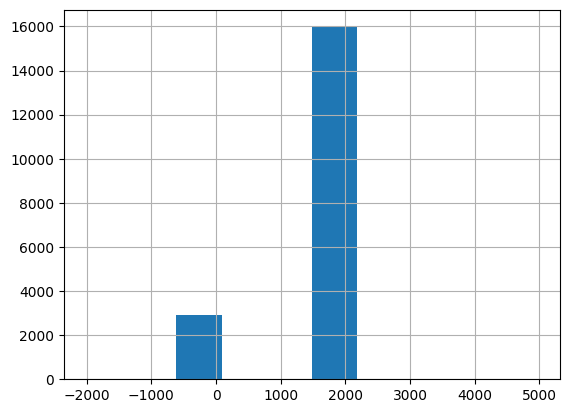

In [312]:
df['build_year'].hist()

In [313]:
df.loc[df['build_year'] < 1000, 'build_year'] = 0

In [314]:
df.loc[df['build_year'] > 2024, 'build_year'] = 0

In [315]:
# Те годы постройки домов, которые встречаются менее 10 раз, также присвоим значение 0
df.loc[(df.groupby('build_year')['build_year'].transform('size') < 10), 'build_year'] = 0

In [316]:
df['build_year'].value_counts()

build_year
0       3020
2014     919
2015     824
2013     464
1970     418
        ... 
1929      12
1928      12
1935      11
1937      10
1927      10
Name: count, Length: 77, dtype: int64

In [317]:
df['build_year'].unique()

array([1969, 1960, 1985, 2017, 2006, 1970, 1986, 1984, 2013, 1980, 2014,
       1993, 1997, 1981, 1964, 1979, 2004,    0, 1994, 1972, 2010, 2012,
       1976, 2000, 1966, 2015, 1989, 1987, 1977, 1983, 1962, 2008, 2003,
       1965, 1990, 1971, 1978, 1974, 1961, 2016, 1959, 1975, 1957, 1968,
       1992, 1967, 1956, 1995, 1988, 1958, 1973, 1999, 2005, 2002, 2007,
       2001, 1982, 1950, 2011, 1951, 1955, 1991, 1952, 1963, 2009, 1998,
       1954, 1927, 1917, 1937, 1996, 1929, 1928, 1953, 1940, 1934, 1935],
      dtype=int16)

In [318]:
len(df[df['build_year']==0])

3020

In [319]:
def proba(value_count):
    result = []
    for value in value_count:
        result.append(round(value / len(df[df['build_year'] !=0]), 8))
    return result

# print(result_list)

# print(sum(result_list))

In [320]:
# Фильтруем нулевые значения в колонке build_year
filtered_build_year = df[df['build_year'] != 0]['build_year'].value_counts()

result_list = proba(filtered_build_year)

In [321]:
df['build_year'].unique()

array([1969, 1960, 1985, 2017, 2006, 1970, 1986, 1984, 2013, 1980, 2014,
       1993, 1997, 1981, 1964, 1979, 2004,    0, 1994, 1972, 2010, 2012,
       1976, 2000, 1966, 2015, 1989, 1987, 1977, 1983, 1962, 2008, 2003,
       1965, 1990, 1971, 1978, 1974, 1961, 2016, 1959, 1975, 1957, 1968,
       1992, 1967, 1956, 1995, 1988, 1958, 1973, 1999, 2005, 2002, 2007,
       2001, 1982, 1950, 2011, 1951, 1955, 1991, 1952, 1963, 2009, 1998,
       1954, 1927, 1917, 1937, 1996, 1929, 1928, 1953, 1940, 1934, 1935],
      dtype=int16)

In [322]:
# Вероятность встречи каждого значения:
probabilities_build_year = result_list

# Считаем количество пропущенных значений для каждой категории
missing_values_build_year = (df['build_year'] == 0).sum()

# my_array = np.asarray(result_list)

# Генерирация случайного числа с учетом вероятности
generated_values_build_year = np.random.choice([2014, 2015, 2013, 1970, 1969, 1968, 1967, 1965, 2016, 1972, 1974, 1971, 1966, 1960, 1962, 1973,
1963, 1964, 1975, 1961, 1976, 1977, 2006, 1979, 1978, 2008, 2012, 1980, 2004, 2007, 2002, 1959,
2003, 1982, 1981, 1983, 1958, 1985, 2001, 2009, 2005, 1987, 1984, 2011, 1996, 1994, 1989, 1988,
2017, 1995, 1998, 1997, 1992, 2010, 1986, 2000, 1990, 1999, 1957, 1993, 1991, 1955, 1956, 1952,
1954, 1953, 1951, 1950, 1917, 1940, 1934, 1929, 1928, 1935, 1927, 1937], size=missing_values_build_year, p=probabilities_build_year)

# Заполняем пропущенные значения в колонке state
df.loc[df['build_year'] == 0, 'build_year'] = generated_values_build_year

/tmp/ipykernel_33/2162533894.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1952 1960 2005 ... 1972 1968 1960]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  df.loc[df['build_year'] == 0, 'build_year'] = generated_values_build_year


In [323]:
df['build_year'].unique()

array([1969, 1960, 1985, 2017, 2006, 1970, 1986, 1984, 2013, 1980, 2014,
       1993, 1997, 1981, 1964, 1979, 2004, 1952, 1994, 1972, 2005, 1965,
       2001, 2010, 2012, 1976, 2000, 1966, 2015, 1989, 1987, 1977, 1983,
       1962, 2008, 2003, 1990, 1971, 1978, 1974, 1961, 1991, 1992, 2016,
       1959, 1975, 1957, 1968, 1967, 2007, 1956, 1995, 1988, 1958, 1973,
       1999, 2002, 1982, 1950, 2011, 1951, 1955, 1963, 2009, 1998, 1954,
       1927, 1917, 1937, 1996, 1929, 1928, 1953, 1940, 1934, 1935])

<Axes: >

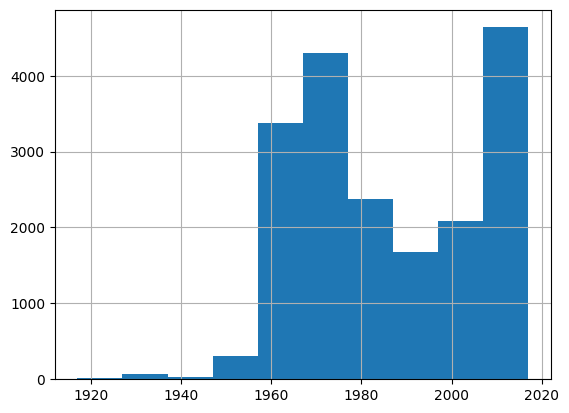

In [324]:
df['build_year'].hist()

**5. ОБРАБОТКА num_room**

In [325]:
df['num_room'].unique()

array([ 2.,  3.,  1., nan,  4., 10.,  6.,  5.,  0., 17., 19.,  9.,  8.,
        7.])

In [326]:
df['num_room'].value_counts()

num_room
2.0     6770
1.0     6169
3.0     4052
4.0      391
5.0       36
0.0       10
6.0        8
8.0        3
10.0       2
17.0       1
19.0       1
9.0        1
7.0        1
Name: count, dtype: int64

In [327]:
# Редким значениям и Nan присвоим 0
df.loc[df['num_room'] > 5, 'num_room'] = 0
df['num_room'] = df['num_room'].fillna(0)

<Axes: >

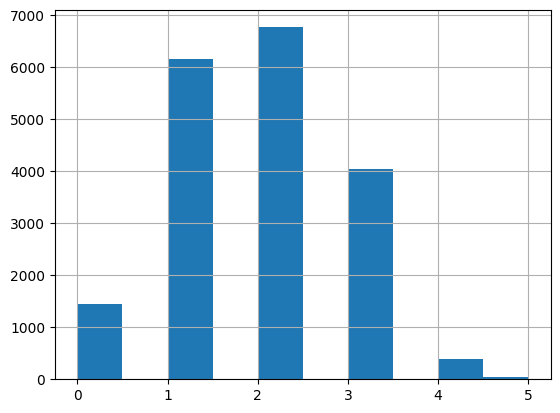

In [328]:
df['num_room'].hist()

In [329]:
# Если комнат 0, то ставим из расчета общей площади / 25 для площадей более 15 и ставим 1 комнату для площадей менее 30
df.loc[df['full_sq'] < 30, 'num_room'] = 1
df.loc[(df['num_room'] < 1) & (df['full_sq'] >= 30), 'num_room'] = round(df['full_sq'] / 25, 0)

In [330]:
df.loc[(df['num_room'] < 2) & (df['full_sq'] > 60), 'num_room'] = round(df['full_sq'] / 25, 0)

In [331]:
df.loc[(df['num_room'] > 3) & (df['full_sq'] < 70), 'num_room'] = round(df['full_sq'] / 25, 0)

<Axes: >

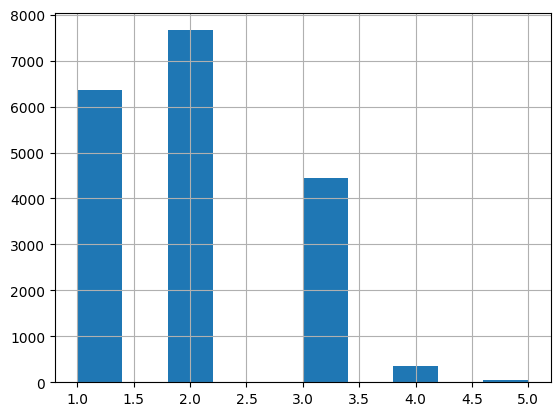

In [332]:
df['num_room'].hist()

In [333]:
df.head(5)

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life
0,42,8.0,2.0,9.0,1.0,1969,2.0,43795,Pechatniki,7100000.0,55485.2,15417.34,48.50,42.00,33.97,76.37,2013.0,34.0
1,55,4.0,3.0,5.0,2.0,1960,3.0,21040,Dorogomilovo,11500000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,46.0
2,43,4.0,2.0,5.0,2.0,1960,2.0,157010,Ivanovskoe,5800000.0,55485.2,15367.58,49.29,42.02,34.55,76.37,2013.0,34.0
3,62,15.0,2.0,22.0,1.0,1985,2.0,178264,Jasenevo,11400000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,45.0
4,80,15.0,1.0,24.0,5.0,2017,3.0,76284,Nagatinskij Zaton,12697154.0,64310.0,18745.28,50.42,39.16,31.09,76.77,2015.0,67.0


In [334]:
# df.loc[np.random.randint(0, 50) : np.random.randint(40, 10000)]

**6. ОБРАБОТКА sub_area**

In [335]:
enc = OrdinalEncoder()

In [336]:
# Преобразуем категориальную переменную sub_area

df.loc[:, 'sub_area'] = enc.fit_transform(df.loc[:, 'sub_area'].to_frame())
df

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life
0,42,8.0,2.0,9.0,1.0,1969,2.0,43795,83.0,7100000.0,55485.2,15417.34,48.50,42.00,33.97,76.37,2013.0,34.0
1,55,4.0,3.0,5.0,2.0,1960,3.0,21040,23.0,11500000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,46.0
2,43,4.0,2.0,5.0,2.0,1960,2.0,157010,33.0,5800000.0,55485.2,15367.58,49.29,42.02,34.55,76.37,2013.0,34.0
3,62,15.0,2.0,22.0,1.0,1985,2.0,178264,37.0,11400000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,45.0
4,80,15.0,1.0,24.0,5.0,2017,3.0,76284,70.0,12697154.0,64310.0,18745.28,50.42,39.16,31.09,76.77,2015.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,53,9.0,3.0,16.0,3.0,1976,2.0,1318695,141.0,NaN,55485.2,15215.84,49.12,42.10,34.53,76.37,2013.0,39.0
18862,31,5.0,2.0,13.0,1.0,1960,1.0,85083,123.0,NaN,44898.7,12992.44,46.44,37.93,30.74,75.79,2011.0,24.8
18863,38,8.0,3.0,16.0,1.0,1977,1.0,111023,78.0,NaN,61208.0,16648.70,53.21,43.23,34.30,76.70,2014.0,29.0
18864,120,7.0,3.0,10.0,2.0,1985,3.0,47245,63.0,NaN,61208.0,16648.70,53.21,43.23,34.30,76.70,2014.0,68.0


In [337]:
# Кастуем sub_area в численный тип данных
df['sub_area'] = pd.to_numeric(df['sub_area'])

In [338]:
df['sub_area'] = df['sub_area'].astype('int16')

**6. ОБРАБОТКА salary и fixed_basket**

<Axes: >

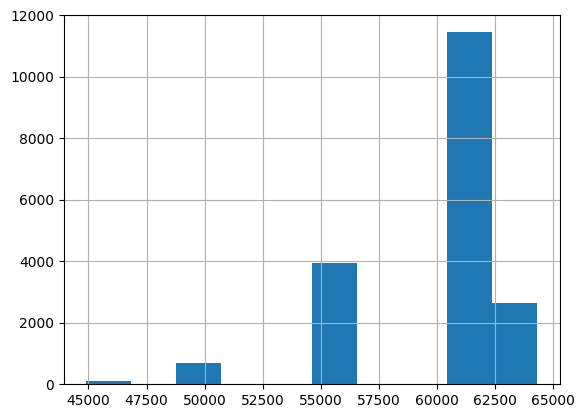

In [339]:
df['salary'].hist()

<Axes: >

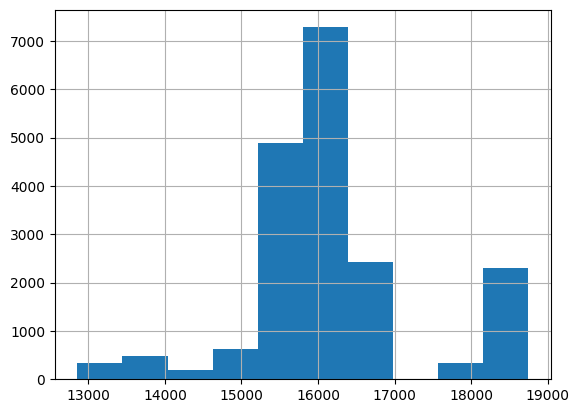

In [340]:
df['fixed_basket'].hist()

In [341]:
df['fixed_basket'].unique()

array([15417.34, 15241.93, 15367.58, 18745.28, 16269.79, 16251.41,
       16648.7 , 16041.58, 16295.  , 15215.84, 15730.81, 18295.07,
       16165.3 , 15916.88, 15285.65, 16134.39, 18720.65, 13948.2 ,
       18642.71, 13494.23, 15608.27, 16205.25, 18557.88, 17817.4 ,
       16910.54, 13807.34, 14983.92, 15130.84, 13350.32, 12959.49,
       12922.97, 15163.82, 14581.91, 13660.59, 14739.33, 12992.44,
       13726.03, 13166.88, 13243.77, 13872.82, 13292.33, 13762.47,
       13128.84, 14377.54, 14289.4 , 12856.97])

In [342]:
df[df['fixed_basket'].isna()]

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life


In [343]:
df.head(5)

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life
0,42,8.0,2.0,9.0,1.0,1969,2.0,43795,83,7100000.0,55485.2,15417.34,48.50,42.00,33.97,76.37,2013.0,34.0
1,55,4.0,3.0,5.0,2.0,1960,3.0,21040,23,11500000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,46.0
2,43,4.0,2.0,5.0,2.0,1960,2.0,157010,33,5800000.0,55485.2,15367.58,49.29,42.02,34.55,76.37,2013.0,34.0
3,62,15.0,2.0,22.0,1.0,1985,2.0,178264,37,11400000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,45.0
4,80,15.0,1.0,24.0,5.0,2017,3.0,76284,70,12697154.0,64310.0,18745.28,50.42,39.16,31.09,76.77,2015.0,67.0


**7. Обработка rent_price_3room_eco, rent_price_2room_eco, rent_price_1room_eco**

<Axes: >

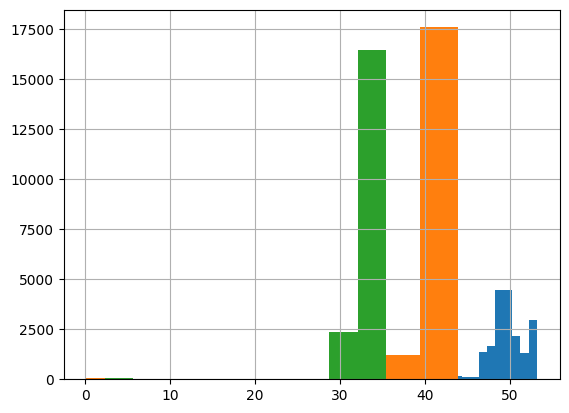

In [344]:
df['rent_price_3room_eco'].hist()
df['rent_price_2room_eco'].hist()
df['rent_price_1room_eco'].hist()

In [345]:
df['rent_price_3room_eco'].value_counts()

rent_price_3room_eco
49.89    1411
49.32    1114
48.70    1041
53.21    1016
49.75    1006
49.24     991
50.24     950
51.41     922
52.82     909
49.29     777
48.50     763
47.04     751
48.28     746
52.81     714
50.93     625
50.36     608
50.41     507
49.12     489
50.42     442
51.49     415
48.22     368
52.64     346
49.01     329
48.08     270
46.56     145
47.09     121
47.56     110
47.30      87
46.94      83
47.35      81
47.19      76
48.97      71
45.31      63
43.42      62
46.29      55
45.53      51
47.90      47
44.57      43
44.25      42
46.64      41
46.50      39
43.46      36
46.44      36
47.71      36
45.20      31
Name: count, dtype: int64

In [346]:
# Посчитаем средние значения по всем стобцам исключив значения менее 10
# У столбца rent_price_3room_eco нет отклоений
df['rent_price_3room_eco'].mean()

49.84068429979858

In [347]:
df['rent_price_2room_eco'].value_counts()

rent_price_2room_eco
42.64    1411
40.95    1114
41.18    1041
43.23    1016
41.91    1006
41.79     991
41.17     950
43.26     922
43.85     909
41.96     856
42.02     777
42.00     763
41.44     751
43.11     714
41.97     625
39.92     608
40.49     507
42.10     489
39.16     442
41.86     415
42.33     368
43.29     346
38.91     329
41.42     270
41.09     145
41.30     121
40.66      87
41.01      83
40.77      81
41.19      76
40.83      71
38.45      63
38.25      62
39.00      55
38.39      51
0.10       47
37.96      43
40.22      41
38.62      39
37.93      36
39.47      36
38.10      36
37.85      34
40.25      31
37.73       8
Name: count, dtype: int64

In [348]:
# Сумма значений по колонке rent_price_2room_eco за исключением значений менее 10, таких получилось 47 значений
sum_2room = round(df.loc[df['rent_price_2room_eco'] >= 10, 'rent_price_2room_eco'].sum(), 2)
print(f'Сумма значений по колонке rent_price_2room_eco, за исключением ненормальных значений = {sum_2room}')

# Длина df = 18866 - ненормальные значения = 18819
# Получаем среднее значение по колонке rent_price_2room_eco
result_2room = round(sum_2room / 18819 , 2)
print(f'Среднее значение по колонке rent_price_2room_eco = {result_2room}')

Сумма значений по колонке rent_price_2room_eco, за исключением ненормальных значений = 786267.08
Среднее значение по колонке rent_price_2room_eco = 41.78


In [349]:
df['rent_price_1room_eco'].value_counts()

rent_price_1room_eco
34.52    1668
34.33    1411
32.96    1114
33.06    1041
34.30    1016
33.26    1006
33.65     991
32.87     950
35.37     909
34.55     777
33.97     763
33.49     751
34.83     714
33.67     625
31.41     608
31.35     507
34.53     489
31.09     442
34.35     415
33.15     368
33.88     346
30.29     329
32.55     270
32.23     145
32.61     121
33.07     110
32.90      87
33.10      83
2.31       81
32.69      76
32.93      71
31.64      63
31.10      62
30.48      55
31.12      51
32.62      47
30.67      43
32.11      41
31.53      39
30.74      36
31.11      36
31.25      36
30.89      34
32.84      31
30.63       8
Name: count, dtype: int64

In [350]:
# Сумма значений по колонке rent_price_1room_eco за исключением значений менее 10, таких получилось 81 значение
sum_1room = round(df.loc[df['rent_price_1room_eco'] >= 10, 'rent_price_1room_eco'].sum(), 2)
print(f'Сумма значений по колонке rent_price_1room_eco, за исключением ненормальных значений = {sum_1room}')

# Длина df = 18866 - ненормальные значения = 18785
# Получаем среднее значение по колонке rent_price_1room_eco
result_1room = round(sum_1room / 18785 , 2)
print(f'Среднее значение по колонке rent_price_1room_eco = {result_1room}')

Сумма значений по колонке rent_price_1room_eco, за исключением ненормальных значений = 629499.61
Среднее значение по колонке rent_price_1room_eco = 33.51


In [351]:
# Теперь посмотрим среднюю разницу значений между колонками rent_price_3room_eco и rent_price_2room_eco
# Эта разница не должна быть больше вычесленных разницы средних значений

df.loc[(df['rent_price_3room_eco'] - df['rent_price_2room_eco']) > result_2room, 'rent_price_2room_eco'] = df['rent_price_3room_eco'] - df['rent_price_2room_eco']

In [352]:
# Теперь посмотрим среднюю разницу значений между колонками rent_price_2room_eco и rent_price_1room_eco
# Эта разница не должна быть больше вычесленных разницы средних значений

df.loc[(df['rent_price_2room_eco'] - df['rent_price_1room_eco']) > result_1room, 'rent_price_1room_eco'] = df['rent_price_2room_eco'] - df['rent_price_1room_eco']

In [353]:
df['rent_price_1room_eco'].value_counts()

rent_price_1room_eco
34.52    1668
34.33    1411
32.96    1114
33.06    1041
34.30    1016
33.26    1006
33.65     991
32.87     950
35.37     909
34.55     777
33.97     763
33.49     751
34.83     714
33.67     625
31.41     608
31.35     507
34.53     489
31.09     442
34.35     415
33.15     368
33.88     346
30.29     329
32.55     270
32.23     145
32.61     121
33.07     110
32.90      87
33.10      83
38.46      81
32.69      76
32.93      71
31.64      63
31.10      62
30.48      55
31.12      51
32.62      47
30.67      43
32.11      41
31.53      39
30.74      36
31.11      36
31.25      36
30.89      34
32.84      31
30.63       8
Name: count, dtype: int64

<Axes: >

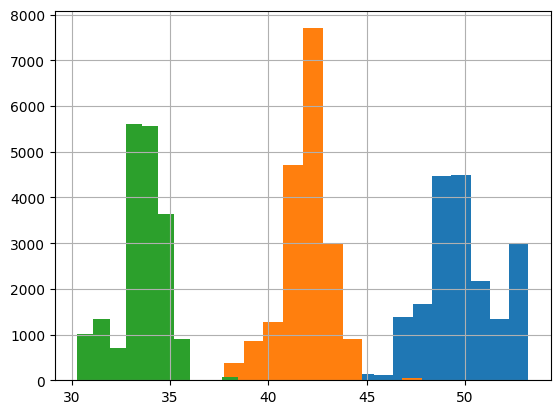

In [354]:
# Теперь графикраспределения выглядит более нормально
df['rent_price_3room_eco'].hist()
df['rent_price_2room_eco'].hist()
df['rent_price_1room_eco'].hist()


In [355]:
df.head(5)

,full_sq,floor,state,max_floor,material,build_year,num_room,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,year,kitch_life
0,42,8.0,2.0,9.0,1.0,1969,2.0,43795,83,7100000.0,55485.2,15417.34,48.50,42.00,33.97,76.37,2013.0,34.0
1,55,4.0,3.0,5.0,2.0,1960,3.0,21040,23,11500000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,46.0
2,43,4.0,2.0,5.0,2.0,1960,2.0,157010,33,5800000.0,55485.2,15367.58,49.29,42.02,34.55,76.37,2013.0,34.0
3,62,15.0,2.0,22.0,1.0,1985,2.0,178264,37,11400000.0,55485.2,15241.93,48.22,42.33,33.15,76.37,2013.0,45.0
4,80,15.0,1.0,24.0,5.0,2017,3.0,76284,70,12697154.0,64310.0,18745.28,50.42,39.16,31.09,76.77,2015.0,67.0


**8. Обработка year**

<Axes: >

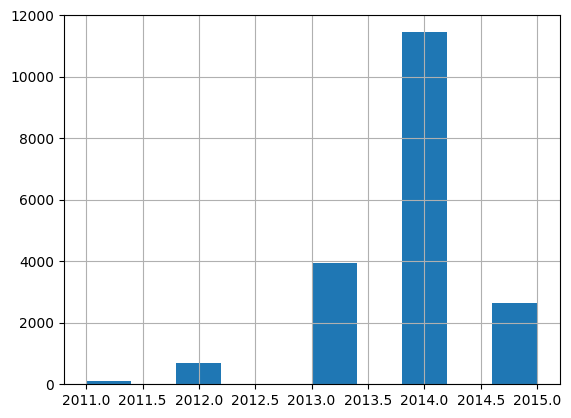

In [356]:
df['year'].hist()

In [357]:
# Дата продажи наверное не может быть раньше даты постройки дома, поэтому дате постройки дома присваиваем дату продажи
df.loc[df['year'] < df['build_year'], 'build_year'] = df['year']

<Axes: >

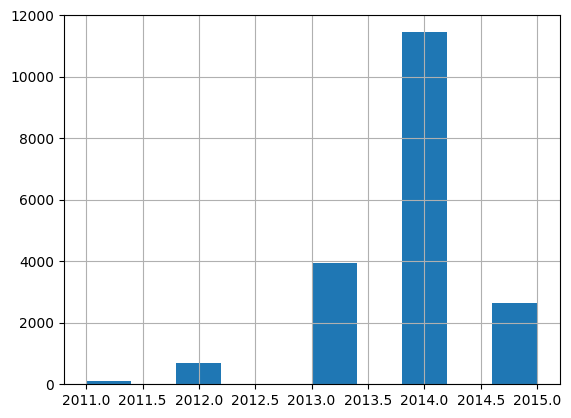

In [358]:
df['year'].hist()

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   full_sq               18866 non-null  int16  
 1   floor                 18866 non-null  float64
 2   state                 18866 non-null  float64
 3   max_floor             18866 non-null  float64
 4   material              18866 non-null  float64
 5   build_year            18866 non-null  int64  
 6   num_room              18866 non-null  float64
 7   full_all              18866 non-null  int64  
 8   sub_area              18866 non-null  int16  
 9   price_doc             15092 non-null  float64
 10  salary                18866 non-null  float64
 11  fixed_basket          18866 non-null  float64
 12  rent_price_3room_eco  18866 non-null  float64
 13  rent_price_2room_eco  18866 non-null  float64
 14  rent_price_1room_eco  18866 non-null  float64
 15  average_life_exp   

In [360]:
# df['rent'] = round(((df['rent_price_3room_eco'] + df['rent_price_2room_eco'] + df['rent_price_1room_eco']) / 3) * 10, 2)
# df.drop(['rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco'], axis=1)

<Axes: >

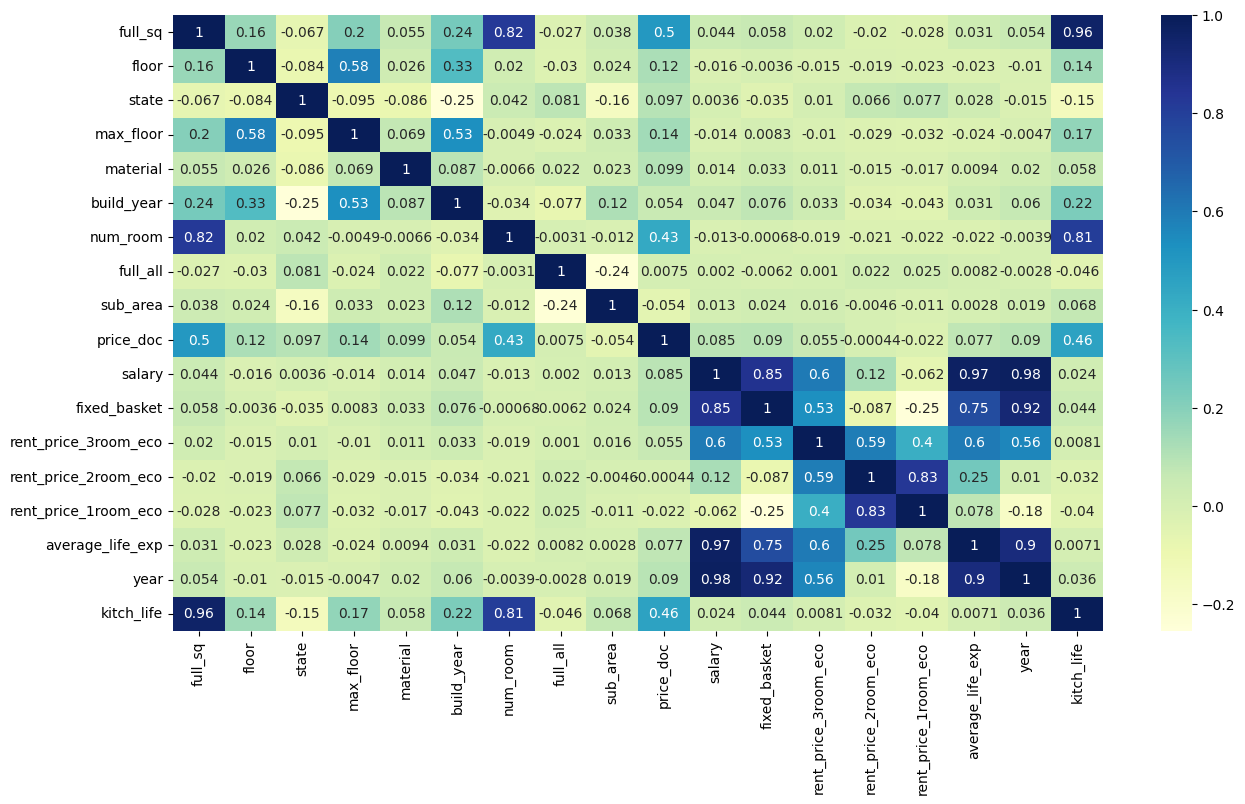

In [361]:
#  Посмотрим ко.aggреляцию признаков 
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'full_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'max_floor'}>],
       [<Axes: title={'center': 'material'}>,
        <Axes: title={'center': 'build_year'}>,
        <Axes: title={'center': 'num_room'}>,
        <Axes: title={'center': 'full_all'}>],
       [<Axes: title={'center': 'sub_area'}>,
        <Axes: title={'center': 'price_doc'}>,
        <Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'fixed_basket'}>],
       [<Axes: title={'center': 'rent_price_3room_eco'}>,
        <Axes: title={'center': 'rent_price_2room_eco'}>,
        <Axes: title={'center': 'rent_price_1room_eco'}>,
        <Axes: title={'center': 'average_life_exp'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'kitch_life'}>, <Axes: >, <Axes: >]],
      dtype=object)

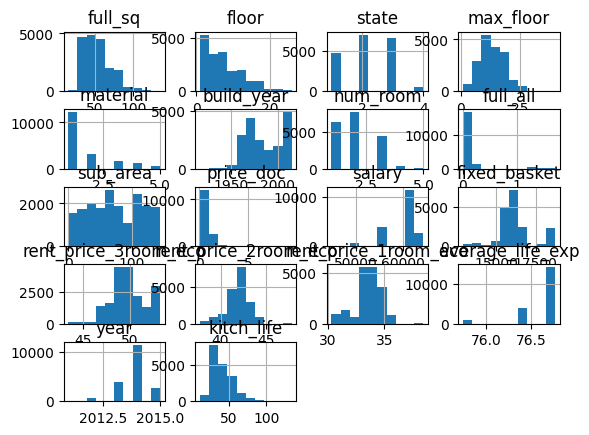

In [362]:
df.hist()

In [363]:
df.columns

Index(['full_sq', 'floor', 'state', 'max_floor', 'material', 'build_year',
       'num_room', 'full_all', 'sub_area', 'price_doc', 'salary',
       'fixed_basket', 'rent_price_3room_eco', 'rent_price_2room_eco',
       'rent_price_1room_eco', 'average_life_exp', 'year', 'kitch_life'],
      dtype='object')

In [364]:
df['full_sq'] = np.log(df['full_sq'] +1)
df['floor'] = np.log(df['floor'] +1)
df['max_floor'] = np.log(df['max_floor'] +1)
df['material'] = np.log(df['material'] +1)
df['build_year'] = np.log(df['build_year'] +1)
df['num_room'] = np.log(df['num_room'] +1)
df['full_all'] = np.log(df['full_all'] +1)
df['sub_area'] = np.log(df['sub_area'] +1)
df['salary'] = np.log(df['salary'] +1)
df['fixed_basket'] = np.log(df['fixed_basket'] +1)
df['rent_price_3room_eco'] = np.log(df['rent_price_3room_eco'] +1)
df['rent_price_2room_eco'] = np.log(df['rent_price_2room_eco'] +1)
df['rent_price_1room_eco'] = np.log(df['rent_price_1room_eco'] +1)
df['average_life_exp'] = np.log(df['average_life_exp'] +1)
df['year'] = np.log(df['year'] +1)
df['kitch_life'] = np.log(df['kitch_life'] +1)


array([[<Axes: title={'center': 'full_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'max_floor'}>],
       [<Axes: title={'center': 'material'}>,
        <Axes: title={'center': 'build_year'}>,
        <Axes: title={'center': 'num_room'}>,
        <Axes: title={'center': 'full_all'}>],
       [<Axes: title={'center': 'sub_area'}>,
        <Axes: title={'center': 'price_doc'}>,
        <Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'fixed_basket'}>],
       [<Axes: title={'center': 'rent_price_3room_eco'}>,
        <Axes: title={'center': 'rent_price_2room_eco'}>,
        <Axes: title={'center': 'rent_price_1room_eco'}>,
        <Axes: title={'center': 'average_life_exp'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'kitch_life'}>, <Axes: >, <Axes: >]],
      dtype=object)

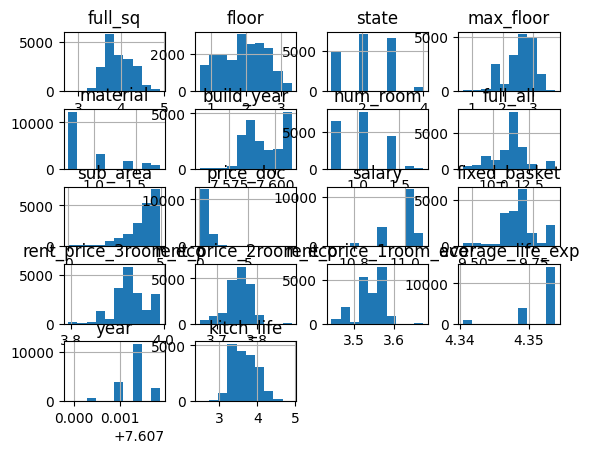

In [365]:
df.hist()

In [366]:
# # Удаляем столбы, которые очень слобо коррелируют:
# df = df.drop(['full_all', 'sub_area', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', 'build_year'], axis=1)

df = df.drop(['state', 'max_floor', 'average_life_exp', 'year', 'material', 'rent_price_3room_eco', 'rent_price_1room_eco', 'rent_price_2room_eco'], axis=1)

In [367]:
# РАЗБИЕНИЕ ДАННЫХ 
data_train = df[df['price_doc'].notnull()] # Данные, в которых есть y
data_test = df[df['price_doc'].isnull()] # Данные, в которых нет y, в дальнейшем могут быть использованны как реальный прогноз

In [368]:
x_train = data_train.drop('price_doc', axis=1)
y_train = data_train['price_doc']

In [369]:
print(len(x_train))
print(len(y_train))
print(len(data_test))

15092
15092
3774


In [370]:
# Стандартизируем данные 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [371]:
x_train = scaler.fit_transform(x_train)

In [373]:
data_test = data_test.drop('price_doc', axis=1)

In [374]:
data_test = scaler.fit_transform(data_test)

In [375]:
x_train

array([[-0.54347363,  0.43919453, -0.82947109, ..., -1.12371207,
        -0.66518734, -0.33928421],
       [ 0.29698162, -0.48081812, -1.28230436, ..., -1.12371207,
        -0.8249789 ,  0.5726297 ],
       [-0.47032747, -0.48081812, -1.28230436, ..., -1.12371207,
        -0.71033128, -0.33928421],
       ...,
       [-0.85413221,  1.33976327,  0.21914524, ...,  0.36880832,
        -0.2198949 , -1.02954211],
       [ 0.23965263,  0.8894789 , -0.32874303, ..., -1.12371207,
        -0.84890283,  0.22469755],
       [ 0.23965263,  1.2387466 ,  1.01069388, ...,  1.12048915,
         1.98756511,  0.38262833]])

In [241]:
#########################################
#########   ОБУЧАЕМ МОДЕЛЬ   ############
#########################################

In [242]:
# train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.1, random_state=42) 


In [243]:
# print(len(train_x))
# print(len(test_x))
# print(len(train_y))
# print(len(test_y))

In [244]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression()

# reg.fit(x_train, y_train)

In [245]:
# reg.score(test_x, test_y)

In [246]:
# reg.predict(test_x)

In [376]:
# Попробуем случайным лесом
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [248]:
# forest.score(x_train, y_train)

In [249]:
# pred = forest.predict(data_test)

In [250]:
# submission = pd.DataFrame({'ID': np.arange(0, len(pred)), 'price_doc': pred})

In [251]:
# submission


In [252]:
# submission.to_csv('submission.csv', index=False)

In [253]:
# from sklearn.metrics import mean_absolute_error

In [254]:
# MAE = mean_absolute_error(test_y, pred)
# MAE

In [255]:
# x_pred = data_test.drop('price_doc', axis=1)

In [256]:
# x_pred = scaler.fit_transform(x_pred)

In [377]:
value_prediction = forest.predict(data_test)

In [378]:
sumbmiss['price_doc'] = value_prediction

In [379]:
sumbmiss['price_doc'] = sumbmiss['price_doc'].astype('int64')

In [380]:
# sumbmiss

In [381]:
sumbmiss.to_csv('submission.csv', index=False)